In [24]:
from skimage import color, io, util
import matplotlib.pyplot as plt

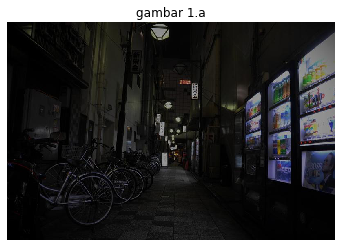

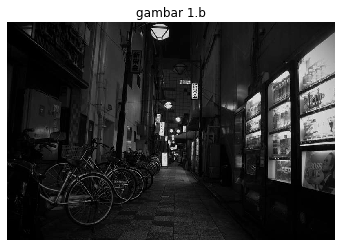

In [33]:
img1 = io.imread('./Tugas Lab 2 - Image/ueno.jpg')
img1gray = color.rgb2gray(img1)
#nomor 1 a
plt.subplot(); plt.imshow(img1)
plt.title('gambar 1.a'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1gray,cmap=plt.cm.gray)
plt.title('gambar 1.b'); plt.axis("off")
plt.show()

175


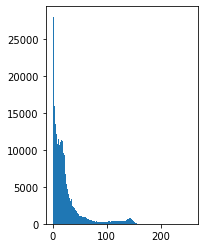

In [26]:
#nomor 1 b
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(img1))
print(np.amax(gray.flatten()))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 256, range=(0,256))
plt.show()

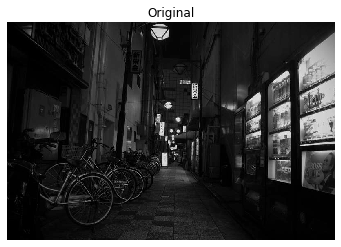

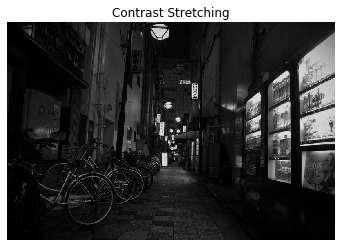

In [36]:
import numpy as np
# nomor 1 c
mn = min(img1gray.flatten())
mx = max(img1gray.flatten())
b=int(np.floor(255 / (mx - mn)))
img1cs = (img1gray-mn)*b
plt.subplot(); plt.imshow(img1gray,cmap=plt.cm.gray)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1cs,cmap=plt.cm.gray)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()


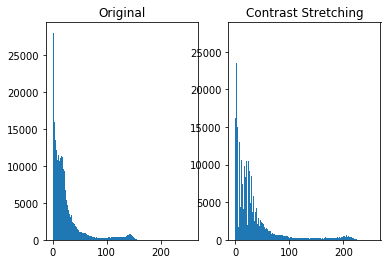

In [18]:
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(img1))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 256, range=(0,256))
plt.title('Original'); 
gray2 = util.img_as_float(color.rgb2gray(img1cs))
plt.subplot(1,2,2); plt.hist(gray2.flatten(), 256, range=(0,256))
plt.title('Contrast Stretching');
plt.show()

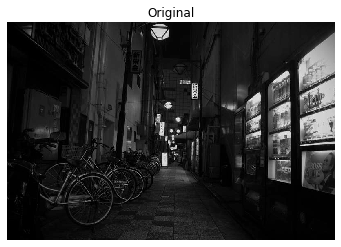

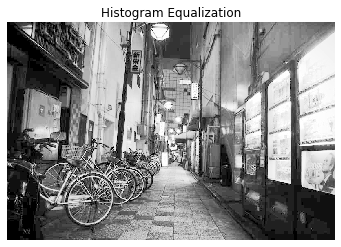

In [34]:
#nomor 1 d
from skimage import exposure
img1he = exposure.equalize_hist(img1gray)
plt.subplot(); plt.imshow(img1gray,cmap=plt.cm.gray)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1he,cmap=plt.cm.gray)
plt.title('Histogram Equalization'); plt.axis("off")
plt.show()

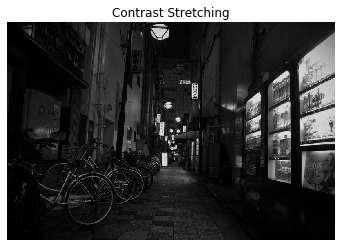

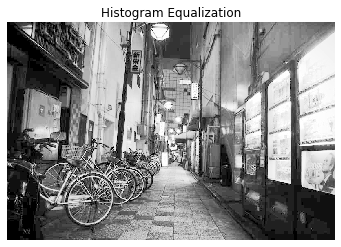

In [39]:
#nomor 1 e 
plt.subplot; plt.imshow(img1cs,cmap=plt.cm.gray)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1he,cmap=plt.cm.gray)
plt.title('Histogram Equalization'); plt.axis("off")
plt.show()

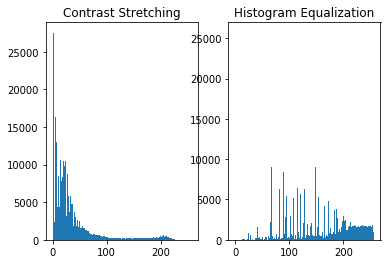

In [23]:
plt.subplot(1,2,1); plt.hist(gray2.flatten(), 256, range=(0,256))
plt.title('Contrast Stretching');
he = util.img_as_ubyte(color.rgb2gray(img1he))
plt.subplot(1,2,2); plt.hist(he.flatten(), 256, range=(0,256))
plt.title('Histogram Equalization');
plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


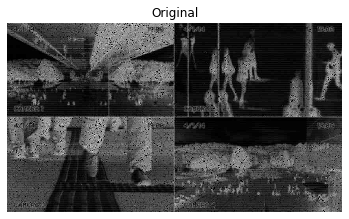

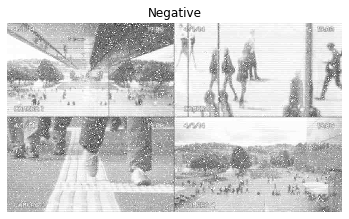

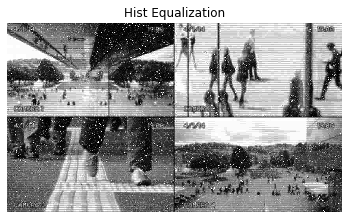

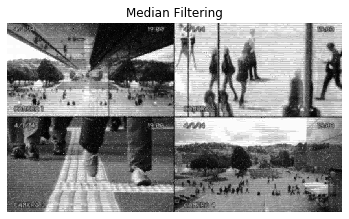

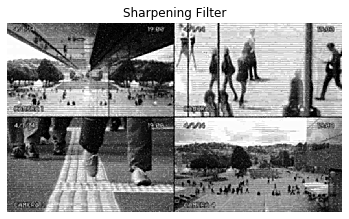

In [37]:
# no 2
i1 = io.imread('./Tugas Lab 2 - Image/cctv.jpg')
i2 = 255-i1
from skimage import exposure
i3 = exposure.equalize_hist(i2)
io.imsave('img2_1.png', i2)
io.imsave('img2_2.png', i3)

from skimage import filters, morphology
ave = filters.rank.mean(i3,selem=morphology.square(3))
gau = util.img_as_ubyte(filters.gaussian(i3, sigma=1))
noise = util.img_as_ubyte(util.random_noise(i3,mode='s&p',salt_vs_pepper=0.02))
med = filters.rank.median(noise,selem=morphology.square(3))
maks=filters.rank.maximum(i3,selem=morphology.square(3))
mins=filters.rank.minimum(i3,selem=morphology.square(3))

#sharpening image
fi = filters.rank.mean(med, selem=morphology.square(3))
sh = filters.unsharp_mask(fi, radius=3)

io.imsave('img2_ave.png', ave)
io.imsave('img2_gau.png', gau)
io.imsave('img2_med.png', med)
io.imsave('img2_maks.png', maks)
io.imsave('img2_min.png', mins)
io.imsave('img2_sh.png', sh)

plt.subplot(); plt.imshow(i1,cmap=plt.cm.gray)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(i2,cmap=plt.cm.gray)
plt.title('Negative'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(i3,cmap=plt.cm.gray)
plt.title('Hist Equalization'); plt.axis("off")
plt.show()
plt.subplot();plt.imshow(med,cmap='gray',vmin=0,vmax=255)
plt.title('Median Filtering'); plt.axis("off")
plt.show()
plt.subplot();plt.imshow(sh,cmap=plt.cm.gray)
plt.title('Sharpening Filter'); plt.axis("off")
plt.show()

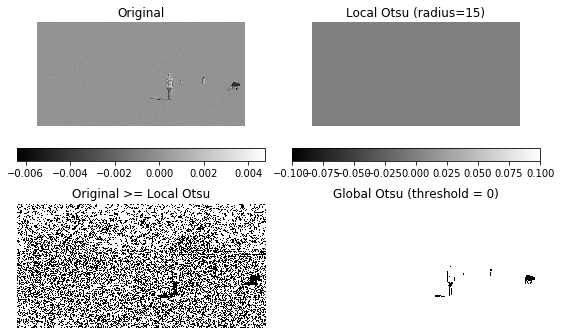

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


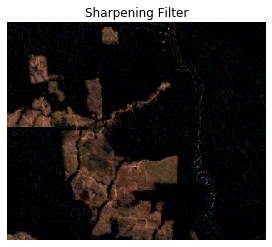

In [31]:
# no 3
from skimage import color, io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import try_all_threshold,threshold_mean,threshold_otsu

pantai1 = io.imread('./Tugas Lab 2 - Image/pantai1.jpg')
pantai2 = io.imread('./Tugas Lab 2 - Image/pantai2.jpg')
pantai_subs = np.subtract(pantai1,pantai2, dtype='int16')
pantai_subs = color.rgb2gray(pantai_subs)
# pantai_subs = pantai_subs > 0

from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte

img = pantai_subs
radius = 15
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

# plt.imshow(pantai_subs,cmap='gray')
# plt.title('Sharpening Filter'); plt.axis("off")
# plt.show()

laut1 = io.imread('./Tugas Lab 2 - Image/teles2010.jpg')
laut2 = io.imread('./Tugas Lab 2 - Image/teles2000.jpg')
laut_subs = np.subtract(laut1,laut2, dtype='int16')
# laut_subs = color.rgb2gray(laut_subs)
# laut_subs = laut_subs <0
plt.imshow(laut_subs,cmap='gray')
plt.title('Sharpening Filter'); plt.axis("off")
plt.show()